# **Análise Exploratória  - ENEM 2019**

![](https://t2.tudocdn.net/523732?w=1200)

# **Introdução**

## **O que iremos fazer aqui?**

Olá! Tudo bem? Antes de começarmos a colocar infinitas linhas de código, vários gráficos e tabelas vamos introduzir um pouquinho o que esperamos com tudo isso!

Iremos fazer uma Análise Exploratória do `Dataset fornecido pelo INEP do ENEM 2019`, que possui 3.2GB, para melhor entender com o que estamos lhe dando, como poderemos proceder com tantas informações, quais suas relações e, ao final, iremos escolher qual dado gostaríamos de prever com base em outros! Massa né!? Vamos lá?

Não precisa se perguntar agora em como iremos fazer isso, em breve iremos mostrar E ENSINAR! (Spoiler: MACHINE LEARNING...)

Antes de começar, veja o arquivo com Legenda de cada Coluna: <a href="Legenda das Colunas.xlsx">Legenda das Colunas.xlsx</a> 


**ATENÇÃO! NÃO PRECISA BAIXAR!**: <a href="http://download.inep.gov.br/microdados/microdados_enem_2019.zip">Link para Download do Dataset e Dados Completos</a> 

E que os jogos comecem!

![](https://media1.tenor.com/images/2fb703878b5ada76c5e8c76db6c37bec/tenor.gif?itemid=16912204)

# Bibliotecas Utilizadas

Confere abaixo a lista das bibliotecas utilizadas para nossa Análise Exploratória Inicial:

## Pandas:
<p>Pandas é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais. É software livre sob a licensa licença BSD</p> 

## NumPy:

<p>NumPy é um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas.</p>

## Matplotlib:
<p>Matplotlib é uma biblioteca abrangente para a criação de visualizações estáticas, animadas e interativas em Python.</p>

## Seaborn:

<p>Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib . Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.</p>

## SciPy:

<p>SciPy é uma biblioteca Open Source em linguagem Python que foi feita para matemáticos, cientistas e engenheiros. Também tem o nome de uma popular conferência de programação científica com Python. A sua biblioteca central é NumPy que fornece uma manipulação conveniente e rápida de um array N-dimensional.</p>

## Scikit-learn:
<p>A scikit-learn (originalmente scikits.learn) é uma biblioteca de aprendizado de máquina de código aberto para a linguagem de programação Python. Ela inclui vários algoritmos de classificação, regressão e agrupamento incluindo máquinas de vetores de suporte, florestas aleatórias, gradient boosting, k-means e DBSCAN, e é projetada para interagir com as bibliotecas Python numéricas e científicas NumPy e SciPy.</p>

## Statsmodels:
<p>Statsmodels é uma biblioteca que fornece classes e funções para a estimativa de muitos modelos estatísticos diferentes, bem como para a realização de testes estatísticos e exploração de dados estatísticos. Uma extensa lista de estatísticas de resultados está disponível para cada estimador. Os resultados são testados em relação aos pacotes estatísticos existentes para garantir que estão corretos.</p>

**Bibliotecas**

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from sklearn.model_selection import train_test_split

# Deixando o trabalho bonitinho e removendo avisos nos outputs
import warnings
warnings.filterwarnings('ignore')

# Output Interativo (Vale a pena deixar tudo mais bonitinho)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Carregando os Dados

**ATENÇÃO** : É de suma importância lembrar que, como já dito, o Dataset original fornecido pelo INEP do ENEM 2019 possui 3.2GB. Com isso, fica inviável sequer ABRIR o documento utilizando Pandas em computadores pessoais (Aceitamos doações de Super Computadores). Por isso, iremos pegar "apenas" 2.5% dos dados através do método no seguinte notebook: <a href="Criando Dataset Menor.ipynb">Criando Dataset Menor.ipynb</a> Você poderá conferir que 2.5% é um bom número para nossa análise...

<a href="http://download.inep.gov.br/microdados/microdados_enem_2019.zip">Link para Download do Dataset e Dados Completos</a> 

In [3]:
fonte = "MICRODADOS_ENEM_2019_SAMPLE_ESTUDO.csv" 
dados_enem2019_original = pd.read_csv(fonte)
dados_enem2019_original.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
1,190001004675,2019,1508100,Tucuruí,15,PA,23,F,1,3,...,A,A,A,C,A,A,E,A,B,B
2,190001004691,2019,1500958,Aurora do Pará,15,PA,22,F,1,3,...,A,A,A,B,A,A,C,A,A,A
3,190001004746,2019,1501402,Belém,15,PA,20,F,1,1,...,A,A,A,B,A,A,D,A,A,B
4,190001004781,2019,1500206,Acará,15,PA,19,F,1,3,...,A,A,A,B,B,A,C,A,A,A


In [4]:
print('Total de Linhas: {}. Total de Colunas: {}' .format(dados_enem2019_original.shape[0],dados_enem2019_original.shape[1]))

Total de Linhas: 127380. Total de Colunas: 136


# Limpeza Inicial

- Iremos inicialmente remover a coluna 'NU_INSCRICAO' uma vez que a mesma serve apenas para cadastro do usuário, seu ID. Também removeremos a coluna 'NU_ANO', que serve apenas para identificar o ano de realização do ENEM. Sabemos que todos os valores são relativos ao ENEM 2019.

- Além disso, iremos remover colunas que não iremos utilizar para análise, não porque não são importantes, mas sim devido a pouca relevância para nosso objetivo ao escolher este Dataset. (P.S: Se você for de alguma empresa e gostar do que ver depois, pode contatar, viu!? Aí podemos usar todos esses dados aí se quiser...)

![](https://media1.giphy.com/media/9PtfS5tTC8ejlYfCLU/giphy.gif)

In [141]:
dados_enem2019=dados_enem2019_original.drop(columns=['NU_INSCRICAO','NU_ANO','IN_BAIXA_VISAO', 'IN_CEGUEIRA',
                                            'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
                                            'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA',
                                            'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO',
                                            'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO',
                                            'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF',
                                            'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
                                            'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',
                                            'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
                                            'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO',
                                            'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_LABIAL',
                                            'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA',
                                            'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR',
                                            'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
                                            'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO',
                                            'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY',
                                            'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
                                            'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO',
                                            'IN_SONDA', 'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL',
                                            'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE',
                                            'IN_MOBILIARIO_ESPECIFICO', 'IN_MATERIAL_ESPECIFICO',
                                            'IN_NOME_SOCIAL','CO_MUNICIPIO_NASCIMENTO',
                                            'CO_PROVA_CN', 'CO_PROVA_CH','CO_PROVA_LC', 'CO_PROVA_MT',
                                            'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
                                            'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
                                            'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
                                            'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
                                            'TP_STATUS_REDACAO','TX_RESPOSTAS_CN'])


dados_enem2019=limpezaDataset(dados_enem2019_original)
dados_enem2019.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,1,Belém,...,A,A,A,C,A,A,D,A,A,A
1,1508100,Tucuruí,15,PA,23,F,1,3,1,Dom Eliseu,...,A,A,A,C,A,A,E,A,B,B
2,1500958,Aurora do Pará,15,PA,22,F,1,3,1,Aurora do Pará,...,A,A,A,B,A,A,C,A,A,A
3,1501402,Belém,15,PA,20,F,1,1,1,Belém,...,A,A,A,B,A,A,D,A,A,B
4,1500206,Acará,15,PA,19,F,1,3,1,Acará,...,A,A,A,B,B,A,C,A,A,A


# Análise Inicial

## O que significam os valores NaN nas notas do candidato no dataset?

Abaixo, vamos criar uma lista com o nome das colunas que representam as notas por matéria com o intuito de facilitar nosso trabalho.

In [142]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC']
dados_enem2019[provas].isna().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC
0,True,True,True,True
1,False,False,False,False
2,True,True,True,True
3,False,False,False,False
4,False,False,False,False


Podemos ver que há valores faltantes apenas pela aparição do True no dataset acima. Por que eles aparecem?

In [24]:
faltas=['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC']
provas_e_faltas=provas+faltas
dados_faltantes_notas = dados_enem2019[provas_e_faltas]
dados_faltantes_notas.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC
0,NaN,NaN,NaN,NaN,0,0,0,0
1,462.2,499.9,477.9,438.0,1,1,1,1
2,NaN,NaN,NaN,NaN,0,0,0,0
3,416.7,417.3,554.3,504.4,1,1,1,1
4,439.3,546.8,506.2,465.6,1,1,1,1


**Conclusão**: A partir da tabela acima é possível relacionar as faltas dos candidatos nos dias das provas que correspondem aos valores `NaN`.

# Analisando a Faixa Etária dos Candidatos

## Uma análise geral

Abaixo, vamos ver, utilizando a função `value_counts`, e normalizando os dados, a frequência de idades dos candidatos.

In [26]:
idades_enem_2019 = dados_enem2019['NU_IDADE']
idades_enem_2019.value_counts(normalize = True)

18    0.169030
17    0.167153
19    0.113291
20    0.080915
16    0.062686
        ...   
7     0.000008
8     0.000008
11    0.000008
2     0.000008
85    0.000008
Name: NU_IDADE, Length: 69, dtype: float64

A idade com maior frequência nos dados da amostra foi de candidatos com 18 anos.

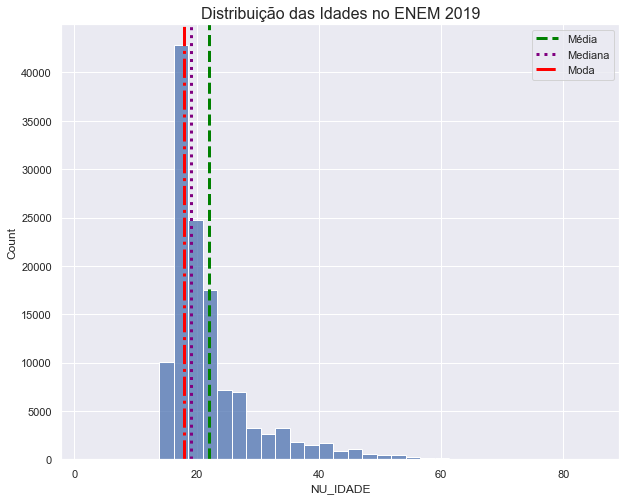

In [47]:
plt.figure(figsize=(10, 8))

enem_media_idades = plt.axvline(x = idades_enem_2019.mean(), c = "green", linewidth = 3, linestyle = '--')
enem_mediana_idades = plt.axvline(x = idades_enem_2019.median(), c = "purple", linewidth = 3, linestyle = ':')
enem_moda_idades = plt.axvline(x = idades_enem_2019.mode()[0], c = "red", linewidth = 3, linestyle = '-.')

plt.legend([enem_media_idades, enem_mediana_idades, enem_moda_idades], ['Média', 'Mediana', 'Moda'])
sns.histplot(idades_enem_2019, bins = 35).set_title('Distribuição das Idades no ENEM 2019', fontsize = 16);

A partir do grafico acima, é visível que a concentração de dados está por volta dos candidatos entre 17 e 24 anos.

In [48]:
idades_enem_2019.describe()

count    127380.000000
mean         22.067051
std           7.433180
min           2.000000
25%          18.000000
50%          19.000000
75%          24.000000
max          85.000000
Name: NU_IDADE, dtype: float64

- A média de idade, na amostra, é de aproximadamente 22 anos.
- A mediana é de 19 anos. 
- É possível visualizar que, apesar da idade máxima ser 85 anos, o terceiro quartil está em 24 anos de idade, sendo assim, ao menos 76% dos candidados tinham 24 anos ou menos.
- Conclui-se, também, que as idades **NÃO** estão normalmente distribuídas.

## Encontrando a média de idade por município

Vamos ver qual(quais) o Município com a média mais alta:

In [52]:
media_idade_municipio = pd.DataFrame(dados_enem2019.groupby(['NO_MUNICIPIO_RESIDENCIA']).mean()['NU_IDADE'])
media_idade_municipio.loc[media_idade_municipio['NU_IDADE'] == media_idade_municipio['NU_IDADE'].max()]

,NU_IDADE
NO_MUNICIPIO_RESIDENCIA,
Maria Helena,55.0


Vamos ver qual(quais) o Município com a média mais baixa:

In [53]:
media_idade_municipio.loc[media_idade_municipio['NU_IDADE'] == media_idade_municipio['NU_IDADE'].min()] 

,NU_IDADE
NO_MUNICIPIO_RESIDENCIA,
Abreulândia,15.0
Diamante do Sul,15.0
Fagundes Varela,15.0
Flor do Sertão,15.0
Gouvelândia,15.0
Itaipava do Grajaú,15.0
Jaborá,15.0
Lajeado Grande,15.0
Mansidão,15.0


Por fim, deixando a curiosidade de lado (UAU MÉDIA DE 15 ANOS), vamos criar um dataframe com o `Nome do Município` e a `Média de Idade` respectiva.

In [55]:
municipio_idade = media_idade_municipio.index
media_idade_municipio['Cidade'] = municipio_idade
media_idade_municipio.head()

,NU_IDADE,Cidade
NO_MUNICIPIO_RESIDENCIA,,
Abadia de Goiás,21.200000,Abadia de Goiás
Abadia dos Dourados,17.000000,Abadia dos Dourados
Abadiânia,17.600000,Abadiânia
Abaetetuba,23.023669,Abaetetuba
Abaeté,21.136364,Abaeté


Abaixo, iremos umportar um Dataset que analisa a longitude e latidude de cada município a fim de gerar um gráfico cartográfico com as médias de idade! Fica lindo, né!?

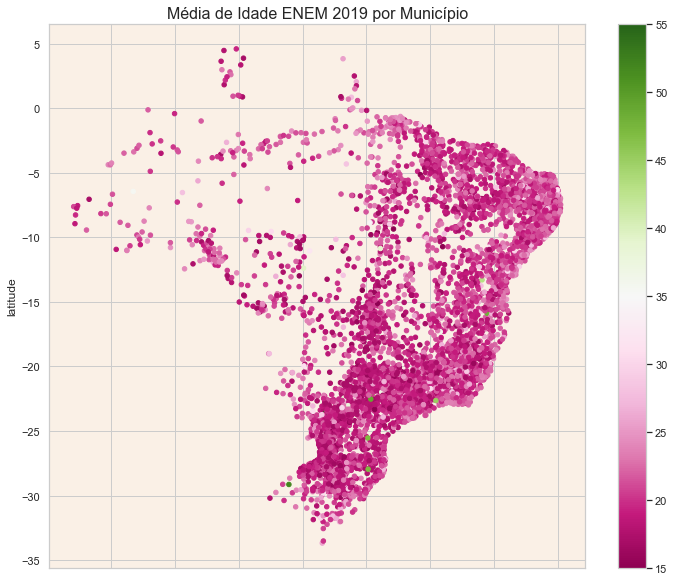

In [71]:
site = 'https://github.com/kelvins/Municipios-Brasileiros/blob/main/csv/municipios.csv?raw=true'

coordenadas = pd.read_csv(site)

concatenado_idade = pd.merge(media_idade_municipio, coordenadas, how = 'left', left_on=['Cidade'], right_on = ['nome'])
concatenado_idade.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_idade['NU_IDADE'],
                         cmap = 'PiYG',
                         figsize = (12,10)).set_title('Média de Idade ENEM 2019 por Município', fontsize = 16)
ax = plt.gca()
ax.set_facecolor('linen')
plt.show();

No gráfico acima, a região mais escura (de acordo com a escala) tende à região Sul/Sudeste. Em contrapartida, o Nordeste apresenta levemente uma cor mais clara que esta. Isso ressalta que, as regiões mais ao Sul do País apresentam idades mais novas em candidatos no ENEM 2019.

**Hipótese:** Possível política de incentivo à alunos de 1º e 2º Ano do Ensino Médio e até mesmo o Ensino Fundamental.

## Qual estado predomina com candidatos mais novos?

Para responder a esta pergunta, vamos pegar a quantidade de candidatos menores de 18 anos em nossos dados e pegar o percentual por estado.

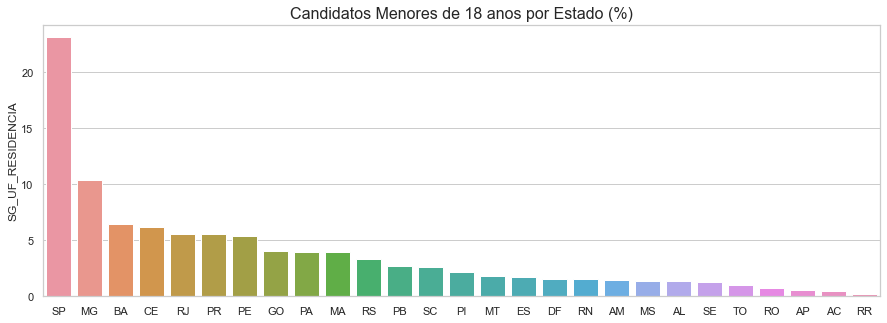

In [70]:
menores_idade_enem2019 = dados_enem2019.query('NU_IDADE < 18')
percentual_menores_idade_enem2019 = pd.DataFrame(menores_idade_enem2019['SG_UF_RESIDENCIA'].value_counts(normalize = True)*100)

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=percentual_menores_idade_enem2019.index, y = percentual_menores_idade_enem2019['SG_UF_RESIDENCIA'], data=percentual_menores_idade_enem2019).set_title('Candidatos Menores de 18 anos por Estado (%)',  fontsize = 16);

**Conclusão**: O Estado com candidatos mais jovens foi o de São Paulo. Em sequência, segue o estado de Minas Gerais. Esse atributo pode reforçar o mapa anterior proposto, demonstrando o escurecimento na região Sudeste.

# **O comportamento das notas no Estado do Ceará de acordo com o IDH**

Bem, chegando neste tópico, você poderia se perguntar: 'Porque analisar o Estado do Ceará?'. Bem, é um Estado muito bom! <3

Escolhemos ele (além de 3 dos 4 integrantes morarem em Fortaleza) para ver como o IDH impacta nas notas. Uma análise de todos os municípios iria requerer mais tabelas de dados e o nosso foco não será utilizar dados externos para prever o modelo, mas sim os fornecidos pelo INEP, logo: Bateu curiosidade para ver `Notas x IDH`, então vamos lá!

Importaremos os dados referente ao estado do Ceará para cada município a fim de coletar algumas informações. Os dados foram obtidos do próprio site do IBGE.

*Referência: https://www.ibge.gov.br/cidades-e-estados/ce.html*

**Importando os dados**

In [76]:
dados_ce = pd.read_excel('CE_dados.xlsx')
ce_dados = dados_enem2019.loc[dados_enem2019['SG_UF_RESIDENCIA'] == 'CE'][['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA']].dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH'])

dados_ce.head()

,Município,Código,Gentílico,Prefeito [2017],Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM,Mortalidade infantil - óbitos por mil nascidos vivos [2017],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$ [2017]
0,Abaiara,2300101.0,abaiarense,AFONSO TAVARES LEITE,180.833,11853.0,58.69,96.7,0.628,33.33,29043.96353,26827.90366,8009.04
1,Acarape,2300150.0,acarapense,FRANKLIN VERISSIMO OLIVEIRA,130.002,15036.0,98.52,96.8,0.606,14.56,38762.53540,36800.46805,9069.38
2,Acaraú,2300200.0,acarauense,ALEXANDRE FERREIRA GOMES DA SILVEIRA,842.471,63104.0,68.31,96.8,0.601,8.81,132656.38793,116962.81301,10192.64
3,Acopiara,2300309.0,acopiarense,ANTONIO ALMEIDA NETO,2254.279,54481.0,22.58,97.2,0.595,19.54,153148.70946,125356.16693,7405.32
4,Aiuaba,2300408.0,aiuabense,RAMILSON ARAUJO MORAES,2438.563,17493.0,6.66,97.5,0.569,10.87,37794.63071,33776.93227,6087.34


**Mensclando as bases de dado por Município para facilitar a manipulação**

In [77]:
nota_media_ce = ce_dados.groupby(['NO_MUNICIPIO_RESIDENCIA']).mean()[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC']]
nota_media_ce['Municipio'] = nota_media_ce.index
nota_media_ce.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,Municipio
NO_MUNICIPIO_RESIDENCIA,,,,,
Abaiara,429.937500,469.000000,490.337500,478.537500,Abaiara
Acarape,437.394737,462.157895,496.789474,475.042105,Acarape
Acaraú,449.180000,446.620000,501.684000,492.792000,Acaraú
Acopiara,443.053333,481.693333,467.543333,499.253333,Acopiara
Aiuaba,420.233333,442.266667,457.250000,465.983333,Aiuaba


**Plotando os Gráficos de Dispersão**

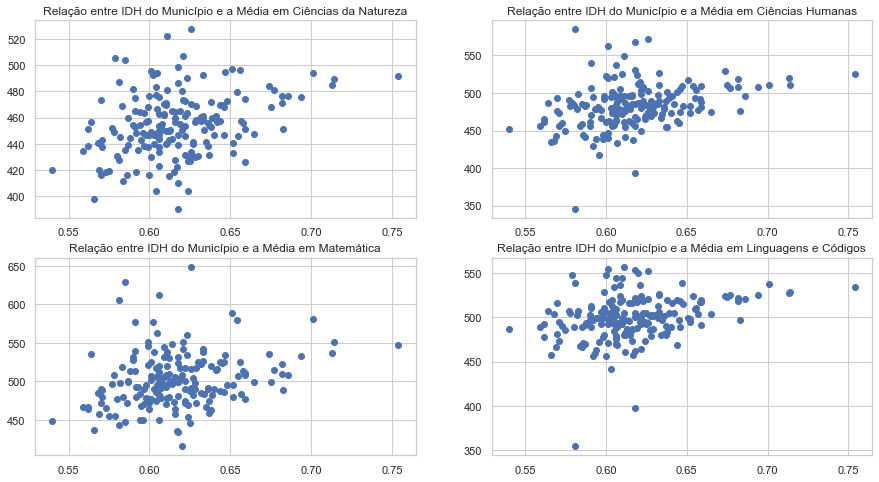

In [78]:
concatenado_ce = pd.merge(nota_media_ce, dados_ce, how = 'left', left_on=['Municipio'], right_on = ['Município'])
idh_medias_ce = concatenado_ce[['Municipio', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'IDHM']]

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('Relação entre IDH do Município e a Média em Ciências da Natureza')
plt.scatter(data =idh_medias_ce, y ='NU_NOTA_CN', x ='IDHM');
plt.subplot(2,2,2)
plt.title('Relação entre IDH do Município e a Média em Ciências Humanas')
plt.scatter(data =idh_medias_ce, y ='NU_NOTA_CH', x ='IDHM');
plt.subplot(2,2,3)
plt.title('Relação entre IDH do Município e a Média em Matemática')
plt.scatter(data =idh_medias_ce, y ='NU_NOTA_MT', x ='IDHM');
plt.subplot(2,2,4)
plt.title('Relação entre IDH do Município e a Média em Linguagens e Códigos')
plt.scatter(data =idh_medias_ce, y ='NU_NOTA_LC', x ='IDHM');

Visualmente os dados se dispersam muito em relação ao IDH do município.

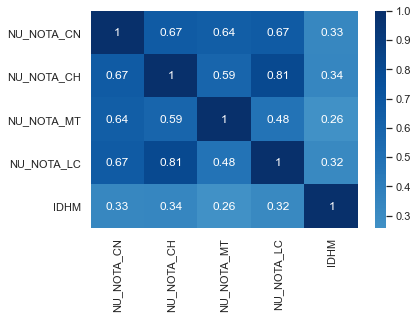

In [79]:
correlacao_ce = idh_medias_ce[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'IDHM']].corr()
sns.heatmap(correlacao_ce, cmap="Blues", center=0, annot=True);

**Conclusão**: De fato, há uma fraca relação entre o IDH e as provas. As que mais se destacaram pela relação foram Ciências Humanas e Ciências da Natureza.  Apesar de haver uma correlação fraca (não se é esperada uma correlação forte, dito que é apenas um evento de muitos) o IDH tem sim sua influência nas notas do ENEM.

Esse fator é visível a partir dos gráficos, onde há uma mínima inclinação positiva da esquerda para direita, em que **quanto maior o IDH maior serão as notas**. 

O critério de análise seguiu a Correlação de Pearson:
![](https://i0.wp.com/www.abgconsultoria.com.br/blog/wp-content/uploads/img2-2.png?w=1500)

# **Influência da Renda Familiar tem sobre as Notas**

## **Como as rendas influenciam diretamente nas notas?**

Para responder isso, vamos trabalhar com a coluna `Q006`, que é referente à questão sobre renda familiar, uma variável `Categórica`. Para analisá-la, bolamos alguns métodos que irão facilitar a visualização dos dados e respectivas interpretações. Segura na cadeira que LÁ VEM CÓDIGO!

Na célula abaixo, criamos um novo dataframe com as respostas (de A a Q) do questionário e o que elas representam.

In [97]:
rendas = {
'A': 'Nenhuma renda.',
'B': 'Até R$ 998,00.',
'C' : 'De R$ 998,01 até R$ 1.497,00.',
'D' : 'De R$ 1.497,01 até R$ 1.996,00.',
'E' : 'De R$ 1.996,01 até R$ 2.495,00.',
'F': 'De R$ 2.495,01 até R$ 2.994,00.',
'G' :'De R$ 2.994,01 até R$ 3.992,00.',
'H' : 'De R$ 3.992,01 até R$ 4.990,00.',
'I' : 'De R$ 4.990,01 até R$ 5.988,00.',
'J' : 'De R$ 5.988,01 até R$ 6.986,00.',
'K' : 'De R$ 6.986,01 até R$ 7.984,00.',
'L' : 'De R$ 7.984,01 até R$ 8.982,00.',
'M' :'De R$ 8.982,01 até R$ 9.980,00.',
'N' : 'De R$ 9.980,01 até R$ 11.976,00.',
'O' : 'De R$ 11.976,01 até R$ 14.970,00.',
'P' : 'De R$ 14.970,01 até R$ 19.960,00.',
'Q' :'Mais de R$ 19.960,00.'
}

df_renda= dados_enem2019.copy().reset_index(drop=True)
df_renda['Q006_RESPOSTA'] = [rendas[resposta] for resposta in df_renda['Q006']]
df_renda[['Q006', 'Q006_RESPOSTA']]

,Q006,Q006_RESPOSTA
0,C,"De R$ 998,01 até R$ 1.497,00."
1,C,"De R$ 998,01 até R$ 1.497,00."
2,A,Nenhuma renda.
3,C,"De R$ 998,01 até R$ 1.497,00."
4,B,"Até R$ 998,00."
...,...,...
127375,C,"De R$ 998,01 até R$ 1.497,00."
127376,A,Nenhuma renda.
127377,C,"De R$ 998,01 até R$ 1.497,00."
127378,E,"De R$ 1.996,01 até R$ 2.495,00."


Abaixo, apenas um método simples e rápido para transformar nosso dicionário acima em uma lista amigável e fofinha ;)

In [98]:
renda_ordenada = pd.DataFrame([rendas])
renda_ordenada = list(renda_ordenada.T[0])
renda_ordenada

['Nenhuma renda.',
 'Até R$ 998,00.',
 'De R$ 998,01 até R$ 1.497,00.',
 'De R$ 1.497,01 até R$ 1.996,00.',
 'De R$ 1.996,01 até R$ 2.495,00.',
 'De R$ 2.495,01 até R$ 2.994,00.',
 'De R$ 2.994,01 até R$ 3.992,00.',
 'De R$ 3.992,01 até R$ 4.990,00.',
 'De R$ 4.990,01 até R$ 5.988,00.',
 'De R$ 5.988,01 até R$ 6.986,00.',
 'De R$ 6.986,01 até R$ 7.984,00.',
 'De R$ 7.984,01 até R$ 8.982,00.',
 'De R$ 8.982,01 até R$ 9.980,00.',
 'De R$ 9.980,01 até R$ 11.976,00.',
 'De R$ 11.976,01 até R$ 14.970,00.',
 'De R$ 14.970,01 até R$ 19.960,00.',
 'Mais de R$ 19.960,00.']

**ATENÇÃO!** Utilizaremos Boxplot para realizar nossa análise daqui em diante! Portanto, é DE SUMA IMPORTÂNCIA que VOCÊ(SIM, VOCÊ) entenda como interpretá-lo. Como somos legais, segue a fonte de onde você pode ver com mais detalhes essa função.

Mas... a gente é legal, e vai pedir para que você foque na linhazinha que representa a mediana(ou Segundo quartil, para os íntimos), viu?!

![](https://res.cloudinary.com/practicaldev/image/fetch/s--RLvfX5qg--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://miro.medium.com/max/1024/0%2ATmxBdUzCLOmZu6zB.png)


*Fonte: https://dev.to/giselyalves13/visualizacao-de-dados-com-seaborn-2892*

Agora, plotaremos o famoso boxplot para cada matéria com todos os dados da função describe, que são: Mínimo, Máximo, 1º, 2º e 3º quartis, e média, para termos uma visualização ampliada da a relação que a renda tem sobre as notas.

Se liga só que mão na roda para você! Abaixo, escolha qual matéria deseja ver:

In [100]:
materias = {'Ciências da Natureza':'NU_NOTA_CN',
            'Ciências Humanas':'NU_NOTA_CH',
            'Matemática':'NU_NOTA_MT',
            'Linguagens e Códigos':'NU_NOTA_LC'}

def f(materia):
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=materias[materia], y = "Q006_RESPOSTA", data = df_renda, order = renda_ordenada)
    plt.title(f"Boxplot das Notas de {materia} pela Renda", fontsize = 16);
    
interact(f, materia=materias.keys());

interactive(children=(Dropdown(description='materia', options=('Ciências da Natureza', 'Ciências Humanas', 'Ma…

**Conclusão**: Quanto maior a renda do candidato, melhor será seu desempenho. Isto é nítido nos Boxplots acima, em que quase todos os gráficos, a nota máxima de quem tem renda maior que 19.960 reais é maior que a nota do maior outlier (você leu sobre o boxplot, né?) de quem não tem nenhuma renda. Há de se observar o segundo quartil, ou a mediana, para cada nível de renda. De fato, há uma disparidade considerável e significativa em relação aos níveis.

Infelizmente, os gráficos demonstram a desigualdade social estruturada no país, onde o acesso à informação e aos materiais é garantido àqueles que tem renda suficiente para suprir uma qualidade de ensino adequada e satisfatória.

## **Há diferença significativa nas notas para cada renda? Testes Estatísticos: ANOVA e Teste de Tukey**

**Análise de Variância** é a técnica estatística que permite avaliar afirmações sobre as médias de populações. A análise visa, fundamentalmente, verificar se existe uma diferença significativa entre as médias e se os fatores exercem influência em alguma variável dependente. 

**Método:** Modelo de ANOVA para realizar o teste se há diferença significativa entre as rendas. 

**Uso:** Para identificar, basta que o *PR(>F)* seja menor que 0,05 (Nível de Confiança de 95%) para contestar que há. 

**Hipótese Nula:** Não há diferença significativa entre os grupos.

*Fonte: https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia*

**Entendendo o Teste de Tukey**

![](https://i.stack.imgur.com/5kB88.jpg)

- **Reject:** Matriz de Booleano. Verdadeiro se rejeitarmos nulo para o par de grupo
- **Meandiffs:** Diferenças médias de pares

Entendeu nada, né? Deixa quieto, a gente já te explica na prática! Mas se tiver curioso, vê o segundo link abaixo! É bem legal e explica como funciona!

*Fontes:* 

*https://towardsdatascience.com/anova-tukey-test-in-python-b3082b6e6bda*

*http://www.portalaction.com.br/anova/31-teste-de-tukey*

**Eliminando os valores NaN para tornar o modelo visível e saudável**

In [101]:
teste_renda = df_renda.dropna(subset=['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH']) 

Bem, agora o negócio começa a complicar... Estatística na veia aqui! Mas não se preocupa, viu? Para cada matéria, faremos AS MESMAS ANÁLISES, portanto, iremos explicar apenas o passo-a-passo em Matemática, e o resto é a mesma coisa, viu? As conclusões podem mudar, claro. APERTA O CINTO, E VAMOS LÁ!

### **Matemática**

Iremos fazer aqui o uso da biblioteca Statsmodel massivamente! Olha que legal: 

Abaixo, utilizaremos a função `statsmodels.formula.api.ols`. <a href="https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html">Segue Documentação</a> 

Tá, e qual o motivo? Bem, não iremos utilizar ela para análise, uma vez que temos múltiplos targets. Ela irá *APENAS PREPARAR* nossos dados para utilizarmos a próxima (e incrível) função: `statsmodels.stats.anova.anova_lm`. <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html">Segue Documentação</a> 

Iremos apenas criar um output com a função `summary` para ver se está tudo certinho! Não se preocupa com isso não, viu?

...

In [102]:
modelo1 = ols('NU_NOTA_MT ~ Q006_RESPOSTA', teste_renda).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     1655.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:33:11   Log-Likelihood:            -5.5351e+05
No. Observations:               92481   AIC:                         1.107e+06
Df Residuals:                   92464   BIC:                         1.107e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            475.6747      0.642    740.750      0.000     474.416     476.933
Q006_RESPOSTA[T.De R$ 1.497,01 até R$ 1.996,00.]      46.8641      1.202     38.977      0.000      44.508      49.221
Q006_RESPOSTA[T.De R$ 1.996,01 até R$ 2.495,00.]      53.3809      1.216     43.903      0.000      50.998      55.764
Q006_RESPOSTA[T.De R$ 11.976,01 até R$ 14.970,00.]   172.9704      3.100     55.799      0.000     166.895     179.046
Q006_RESPOSTA[T.De R$ 14.970,01 até R$ 19.960,00.]   191.7574      3.253     58.955      0.000     185.382     198.133
Q006_RESPOSTA[T.De R$ 2.495,01 até R$ 2.994,00.]      77.8305      1.611     48.325      0.000      74.674      80.987
Q006_RESPOSTA[T.De R$ 2.994,01 até R$ 3.992,00.]      87.1851      1.412     61.756      0.000      84.418      89.952
Q006_RESPOSTA[T.De R$ 3.992,01 até R$ 4.990,00.]     106.6868      1.688     63.192      0.000     103.378     109.996
Q006_RESPOSTA[T.De R$ 4.990,01 até R$ 5.988,00.]     117.9256      1.872     62.992      0.000     114.256     121.595
Q006_RESPOSTA[T.De R$ 5.988,01 até R$ 6.986,00.]     129.9553      2.451     53.027      0.000     125.152     134.759
Q006_RESPOSTA[T.De R$ 6.986,01 até R$ 7.984,00.]     140.9850      2.809     50.186      0.000     135.479     146.491
Q006_RESPOSTA[T.De R$ 7.984,01 até R$ 8.982,00.]     152.2369      3.220     47.271      0.000     145.925     158.549
Q006_RESPOSTA[T.De R$ 8.982,01 até R$ 9.980,00.]     155.4639      3.282     47.365      0.000     149.031     161.897
Q006_RESPOSTA[T.De R$ 9.980,01 até R$ 11.976,00.]    168.8936      2.800     60.328      0.000     163.406     174.381
Q006_RESPOSTA[T.De R$ 998,01 até R$ 1.497,00.]        21.2898      0.907     23.465      0.000      19.512      23.068
Q006_RESPOSTA[T.Mais de R$ 19.960,00.]               202.3794      2.844     71.151      0.000     196.804     207.954
Q006_RESPOSTA[T.Nenhuma renda.]                       -9.1324      1.663     -5.490      0.000     -12.393      -5.872
==============================================================================
Omnibus:                     2697.240   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2937.891
Skew:                           0.432   Prob(JB):                         0.00
Kurtosis:                       3.119   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Estamos apenas brincando. Aqui é coisa séria e VAMOS SIM ANALISAR ESSE OUTPUT. Olha a coluna *`P>|t|`* para cada rótulo de renda. Lembra? Regra geral: Se valor-p < $\alpha$, então rejeitase a hipótese nula. Mas opa, temos aqui vários rótulos, por isso, iremos usar o modelo de ANOVA.

Vamos agora rever nossas hipóteses:

$\qquad H_0:$ $ \beta_i = 0$ 

$\qquad H_1:$ $ \beta_i \neq 0$

E nosso $\alpha=$5% 

Vamos seguir agora para o uso do Modelo `ANOVA`.

In [108]:
resultados1 = sm.stats.anova_lm(modelo1)
resultados1

,df,sum_sq,mean_sq,F,PR(>F)
Q006_RESPOSTA,16.0,2.449500e+08,1.530938e+07,1654.688227,0.0
Residual,92464.0,8.554882e+08,9.252122e+03,NaN,NaN


**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de matemática. (afirmando o argumento da seção acima).

Ah, lembra do Teste de Tukey? Vamos usar ele agora!

Observe que no output a seguir, teremos `FWER=0.05`. Isto representa o nosso $\alpha$!

In [112]:
mc = MultiComparison(teste_renda['NU_NOTA_MT'], teste_renda['Q006'])
resultado_teste1 = mc.tukeyhsd()
resultado_teste1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,9.1324,0.001,3.3789,14.8859,True
A,C,30.4222,0.001,24.6703,36.1741,True
A,D,55.9966,0.001,49.6302,62.3629,True
A,E,62.5133,0.001,56.1163,68.9104,True
A,F,86.9629,0.001,79.5963,94.3295,True
A,G,96.3176,0.001,89.4561,103.179,True
A,H,115.8192,0.001,108.2473,123.3911,True
A,I,127.058,0.001,118.9857,135.1303,True
A,J,139.0878,0.001,129.3366,148.839,True
A,K,150.1174,0.001,139.2711,160.9638,True


Em alguns casos não há diferença significativa na **Nota de Matemática.**. São as rendas: J e K, K e L, K e M, L e M, M e N, N e O, P e Q. 

Ao passo que as categorias vão aumentando, maior será a combinação entre elas. De fato, são muitas rendas que, se comparadas entre si, possuem uma diferença significativa. Entretanto, as aqui listadas não possuem nenhuma diferença significativa se comparadas entre si.

### **Ciências da Natureza**

In [113]:
modelo2 = ols('NU_NOTA_CN ~ Q006_RESPOSTA', teste_renda).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_CN   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     1334.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:58:18   Log-Likelihood:            -5.2203e+05
No. Observations:               92481   AIC:                         1.044e+06
Df Residuals:                   92464   BIC:                         1.044e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            445.1179      0.457    974.253      0.000     444.222     446.013
Q006_RESPOSTA[T.De R$ 1.497,01 até R$ 1.996,00.]      32.6479      0.855     38.164      0.000      30.971      34.325
Q006_RESPOSTA[T.De R$ 1.996,01 até R$ 2.495,00.]      37.3362      0.865     43.159      0.000      35.641      39.032
Q006_RESPOSTA[T.De R$ 11.976,01 até R$ 14.970,00.]   110.5242      2.206     50.113      0.000     106.201     114.847
Q006_RESPOSTA[T.De R$ 14.970,01 até R$ 19.960,00.]   119.4403      2.314     51.612      0.000     114.904     123.976
Q006_RESPOSTA[T.De R$ 2.495,01 até R$ 2.994,00.]      51.8419      1.146     45.241      0.000      49.596      54.088
Q006_RESPOSTA[T.De R$ 2.994,01 até R$ 3.992,00.]      58.8287      1.004     58.568      0.000      56.860      60.797
Q006_RESPOSTA[T.De R$ 3.992,01 até R$ 4.990,00.]      71.8371      1.201     59.805      0.000      69.483      74.191
Q006_RESPOSTA[T.De R$ 4.990,01 até R$ 5.988,00.]      78.4311      1.332     58.885      0.000      75.821      81.042
Q006_RESPOSTA[T.De R$ 5.988,01 até R$ 6.986,00.]      84.7305      1.744     48.593      0.000      81.313      88.148
Q006_RESPOSTA[T.De R$ 6.986,01 até R$ 7.984,00.]      91.5669      1.999     45.813      0.000      87.649      95.484
Q006_RESPOSTA[T.De R$ 7.984,01 até R$ 8.982,00.]     101.0940      2.291     44.120      0.000      96.603     105.585
Q006_RESPOSTA[T.De R$ 8.982,01 até R$ 9.980,00.]      98.4761      2.335     42.169      0.000      93.899     103.053
Q006_RESPOSTA[T.De R$ 9.980,01 até R$ 11.976,00.]    107.8664      1.992     54.153      0.000     103.962     111.770
Q006_RESPOSTA[T.De R$ 998,01 até R$ 1.497,00.]        16.5955      0.646     25.709      0.000      15.330      17.861
Q006_RESPOSTA[T.Mais de R$ 19.960,00.]               121.9305      2.024     60.251      0.000     117.964     125.897
Q006_RESPOSTA[T.Nenhuma renda.]                       -5.7482      1.184     -4.857      0.000      -8.068      -3.428
==============================================================================
Omnibus:                      383.779   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              397.210
Skew:                           0.143   Prob(JB):                     5.58e-87
Kurtosis:                       3.145   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
resultados2 = sm.stats.anova_lm(modelo2)
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Q006_RESPOSTA,16.0,9.996890e+07,6.248057e+06,1334.055574,0.0
Residual,92464.0,4.330556e+08,4.683505e+03,NaN,NaN


**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de Ciências da Natureza. (afirmando o argumento da seção acima)

In [115]:
mc = MultiComparison(teste_renda['NU_NOTA_CN'], teste_renda['Q006'])
resultado_teste2 = mc.tukeyhsd()
resultado_teste2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,5.7482,0.001,1.6547,9.8417,True
A,C,22.3437,0.001,18.2514,26.4361,True
A,D,38.3961,0.001,33.8665,42.9256,True
A,E,43.0844,0.001,38.533,47.6358,True
A,F,57.5901,0.001,52.3489,62.8313,True
A,G,64.5768,0.001,59.695,69.4587,True
A,H,77.5853,0.001,72.198,82.9726,True
A,I,84.1793,0.001,78.436,89.9226,True
A,J,90.4787,0.001,83.5409,97.4165,True
A,K,97.3151,0.001,89.5981,105.0321,True


Em alguns casos não há diferença significativa na **Nota de Ciências da Natureza.**. São as rendas: I e J, J e K, K e L, K e M, L e M, L e N, L e O, M e N, N e O, O e P, P e Q.

Ao passo que as categorias vão aumentando, maior será a combinação entre elas. De fato, são muitas rendas que, se comparadas entre si, possuem uma diferença significativa. Entretanto, as aqui listadas não possuem nenhuma diferença significativa se comparadas entre si.

### **Linguagens e Códigos**

In [116]:
modelo3 = ols('NU_NOTA_LC ~ Q006_RESPOSTA', teste_renda).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_LC   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     1224.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:58:36   Log-Likelihood:            -5.0524e+05
No. Observations:               92481   AIC:                         1.011e+06
Df Residuals:                   92464   BIC:                         1.011e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            493.7282      0.381   1295.750      0.000     492.981     494.475
Q006_RESPOSTA[T.De R$ 1.497,01 até R$ 1.996,00.]      31.9115      0.713     44.729      0.000      30.513      33.310
Q006_RESPOSTA[T.De R$ 1.996,01 até R$ 2.495,00.]      37.2262      0.721     51.597      0.000      35.812      38.640
Q006_RESPOSTA[T.De R$ 11.976,01 até R$ 14.970,00.]    84.1339      1.839     45.740      0.000      80.529      87.739
Q006_RESPOSTA[T.De R$ 14.970,01 até R$ 19.960,00.]    90.1164      1.930     46.692      0.000      86.334      93.899
Q006_RESPOSTA[T.De R$ 2.495,01 até R$ 2.994,00.]      47.5205      0.956     49.725      0.000      45.647      49.394
Q006_RESPOSTA[T.De R$ 2.994,01 até R$ 3.992,00.]      52.9932      0.838     63.260      0.000      51.351      54.635
Q006_RESPOSTA[T.De R$ 3.992,01 até R$ 4.990,00.]      59.1929      1.002     59.087      0.000      57.229      61.156
Q006_RESPOSTA[T.De R$ 4.990,01 até R$ 5.988,00.]      64.1107      1.111     57.714      0.000      61.933      66.288
Q006_RESPOSTA[T.De R$ 5.988,01 até R$ 6.986,00.]      67.6497      1.454     46.520      0.000      64.799      70.500
Q006_RESPOSTA[T.De R$ 6.986,01 até R$ 7.984,00.]      70.2929      1.667     42.169      0.000      67.026      73.560
Q006_RESPOSTA[T.De R$ 7.984,01 até R$ 8.982,00.]      76.9312      1.911     40.258      0.000      73.186      80.677
Q006_RESPOSTA[T.De R$ 8.982,01 até R$ 9.980,00.]      77.0869      1.948     39.581      0.000      73.270      80.904
Q006_RESPOSTA[T.De R$ 9.980,01 até R$ 11.976,00.]     82.2308      1.661     49.500      0.000      78.975      85.487
Q006_RESPOSTA[T.De R$ 998,01 até R$ 1.497,00.]        18.0050      0.538     33.444      0.000      16.950      19.060
Q006_RESPOSTA[T.Mais de R$ 19.960,00.]                92.1963      1.688     54.626      0.000      88.888      95.504
Q006_RESPOSTA[T.Nenhuma renda.]                      -10.1249      0.987    -10.258      0.000     -12.060      -8.190
==============================================================================
Omnibus:                    13274.770   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37667.135
Skew:                          -0.777   Prob(JB):                         0.00
Kurtosis:                       5.713   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
resultados3 = sm.stats.anova_lm(modelo3)
resultados3

,df,sum_sq,mean_sq,F,PR(>F)
Q006_RESPOSTA,16.0,6.378216e+07,3.986385e+06,1223.717769,0.0
Residual,92464.0,3.012109e+08,3.257602e+03,NaN,NaN


**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de Linguagens e Códigos. (afirmando o argumento da seção acima)

In [118]:
mc = MultiComparison(teste_renda['NU_NOTA_LC'], teste_renda['Q006'])
resultado_teste3 = mc.tukeyhsd()
resultado_teste3.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,10.1249,0.001,6.7109,13.5388,True
A,C,28.1299,0.001,24.7169,31.5429,True
A,D,42.0364,0.001,38.2587,45.814,True
A,E,47.3511,0.001,43.5552,51.1469,True
A,F,57.6454,0.001,53.2742,62.0165,True
A,G,63.1181,0.001,59.0467,67.1895,True
A,H,69.3178,0.001,64.8248,73.8108,True
A,I,74.2356,0.001,69.4457,79.0254,True
A,J,77.7745,0.001,71.9884,83.5606,True
A,K,80.4178,0.001,73.9819,86.8538,True


Em alguns casos não há diferença significativa na **Nota de Linguagens e Códigos.**. São as rendas: I e J, I e K, J e K, K e L, K e M, L e M, L e N, L e O, M e N, M e O, N e O, N e P, O e P, O e Q, P e Q.

Ao passo que as categorias vão aumentando, maior será a combinação entre elas. De fato, são muitas rendas que, se comparadas entre si, possuem uma diferença significativa. Entretanto, as aqui listadas não possuem nenhuma diferença significativa se comparadas entre si.

### **Ciências Humanas**

In [119]:
modelo4 = ols('NU_NOTA_CH ~ Q006_RESPOSTA', teste_renda).fit()
modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_CH   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     1207.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:59:32   Log-Likelihood:            -5.2892e+05
No. Observations:               92481   AIC:                         1.058e+06
Df Residuals:                   92464   BIC:                         1.058e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                            474.7482      0.492    964.485      0.000     473.783     475.713
Q006_RESPOSTA[T.De R$ 1.497,01 até R$ 1.996,00.]      37.4476      0.922     40.631      0.000      35.641      39.254
Q006_RESPOSTA[T.De R$ 1.996,01 até R$ 2.495,00.]      43.2789      0.932     46.436      0.000      41.452      45.106
Q006_RESPOSTA[T.De R$ 11.976,01 até R$ 14.970,00.]   112.1992      2.376     47.219      0.000     107.542     116.856
Q006_RESPOSTA[T.De R$ 14.970,01 até R$ 19.960,00.]   121.0628      2.493     48.557      0.000     116.176     125.950
Q006_RESPOSTA[T.De R$ 2.495,01 até R$ 2.994,00.]      57.6405      1.235     46.689      0.000      55.221      60.060
Q006_RESPOSTA[T.De R$ 2.994,01 até R$ 3.992,00.]      64.1338      1.082     59.264      0.000      62.013      66.255
Q006_RESPOSTA[T.De R$ 3.992,01 até R$ 4.990,00.]      73.9198      1.294     57.119      0.000      71.383      76.456
Q006_RESPOSTA[T.De R$ 4.990,01 até R$ 5.988,00.]      80.3449      1.435     55.990      0.000      77.532      83.157
Q006_RESPOSTA[T.De R$ 5.988,01 até R$ 6.986,00.]      87.9824      1.879     46.835      0.000      84.300      91.664
Q006_RESPOSTA[T.De R$ 6.986,01 até R$ 7.984,00.]      92.5368      2.153     42.973      0.000      88.316      96.757
Q006_RESPOSTA[T.De R$ 7.984,01 até R$ 8.982,00.]     101.7135      2.469     41.203      0.000      96.875     106.552
Q006_RESPOSTA[T.De R$ 8.982,01 até R$ 9.980,00.]     100.7132      2.516     40.030      0.000      95.782     105.644
Q006_RESPOSTA[T.De R$ 9.980,01 até R$ 11.976,00.]    108.8074      2.146     50.703      0.000     104.601     113.013
Q006_RESPOSTA[T.De R$ 998,01 até R$ 1.497,00.]        20.5272      0.695     29.516      0.000      19.164      21.890
Q006_RESPOSTA[T.Mais de R$ 19.960,00.]               123.0362      2.180     56.431      0.000     118.763     127.310
Q006_RESPOSTA[T.Nenhuma renda.]                       -8.5977      1.275     -6.743      0.000     -11.097      -6.098
==============================================================================
Omnibus:                     4927.960   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8939.815
Skew:                          -0.414   Prob(JB):                         0.00
Kurtosis:                       4.279   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
resultados4 = sm.stats.anova_lm(modelo4)
resultados4

,df,sum_sq,mean_sq,F,PR(>F)
Q006_RESPOSTA,16.0,1.049526e+08,6.559536e+06,1206.626848,0.0
Residual,92464.0,5.026583e+08,5.436259e+03,NaN,NaN


**Rejeitar a hipótese nula.** O resultado demonstra que sim, há diferença significativa entre os grupos nas notas de Ciências Humanas. (afirmando o argumento da seção acima)

In [121]:
mc = MultiComparison(teste_renda['NU_NOTA_CH'], teste_renda['Q006'])
resultado_teste4 = mc.tukeyhsd() # Alpha 0.05
resultado_teste4.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.5977,0.001,4.1875,13.0079,True
A,C,29.1249,0.001,24.7159,33.5339,True
A,D,46.0453,0.001,41.1652,50.9253,True
A,E,51.8766,0.001,46.973,56.7801,True
A,F,66.2382,0.001,60.5914,71.8849,True
A,G,72.7315,0.001,67.4719,77.991,True
A,H,82.5175,0.001,76.7133,88.3216,True
A,I,88.9426,0.001,82.755,95.1302,True
A,J,96.5801,0.001,89.1055,104.0547,True
A,K,101.1345,0.001,92.8204,109.4486,True


Em alguns casos não há diferença significativa na **Ciências Humanas.** São as rendas: I e J, J e K, K e L, K e M, L e M, L e N, L e O, M e N, M e O, N e O, O e P, O e Q, P e Q.

Ao passo que as categorias vão aumentando, maior será a combinação entre elas. De fato, são muitas rendas que, se comparadas entre si, possuem uma diferença significativa. Entretanto, as aqui listadas não possuem nenhuma diferença significativa se comparadas entre si.

# **Influência do Grau de Escolaridade dos Pais sobre as Notas**

## **O grau de escolaridade dos pais influencia diretamente as notas dos filhos?**

Na célula abaixo, criamos um novo dataframe com as respostas possíveis do questionário (de A a H) e o que elas representam.

Para responder isso, vamos trabalhar com a coluna `Q001`, que é referente à questão sobre o grau de escolaridade dos pais, uma variável `Categórica`. Para analisá-la, bolamos alguns métodos que irão facilitar a visualização dos dados e respectivas interpretações. E mais códigooo!

Na célula abaixo, criamos um novo dataframe com as respostas (de A a H) do questionário e o que elas representam.

In [126]:
respostas_escolaridade_pais = {
'A': 'Nunca estudou.',
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
'G': 'Completou a Pós-graduação.',
'H': 'Não sei.'
}

### **Análise das respostas relacionadas ao pai**

Abaixo, apenas um método simples e rápido para transformar nosso dicionário acima em uma lista amigável e fofinha ;)

In [127]:
grau_esc_pai = dados_enem2019.copy().reset_index(drop=True)
grau_esc_pai['Q001_RESPOSTA'] = [respostas_escolaridade_pais[resposta] for resposta in grau_esc_pai['Q001']]
grau_esc_pai[['Q001', 'Q001_RESPOSTA']]

,Q001,Q001_RESPOSTA
0,D,Completou a 8ª série/9º ano do Ensino Fundamen...
1,F,"Completou a Faculdade, mas não completou a Pós..."
2,H,Não sei.
3,C,"Completou a 4ª série/5º ano, mas não completou..."
4,F,"Completou a Faculdade, mas não completou a Pós..."
...,...,...
127375,B,Não completou a 4ª série/5º ano do Ensino Fund...
127376,B,Não completou a 4ª série/5º ano do Ensino Fund...
127377,B,Não completou a 4ª série/5º ano do Ensino Fund...
127378,D,Completou a 8ª série/9º ano do Ensino Fundamen...


Abaixo, apenas um método simples e rápido para transformar nosso dicionário acima em uma lista amigável e fofinha ;)

In [128]:
escolaridade_ordenada = pd.DataFrame([respostas_escolaridade_pais])
escolaridade_ordenada = list(escolaridade_ordenada.T[0])

Nesta análise também utilizaremos o Boxplot para cada matéria com todos os dados da função describe, que são: Mínimo, Máximo, 1º, 2º e 3º quartis, e média, para termos uma visualização ampliada da a relação que o grau de escolaridade do pai tem sobre as notas.

In [129]:
materias = {'Ciências da Natureza':'NU_NOTA_CN',
            'Ciências Humanas':'NU_NOTA_CH',
            'Matemática':'NU_NOTA_MT',
            'Linguagens e Códigos':'NU_NOTA_LC'}

def f(materia):
    plt.figure(figsize=(8, 8))
    sns.boxplot(x=materias[materia], y = "Q001_RESPOSTA", data = grau_esc_pai, order = escolaridade_ordenada)
    plt.title(f"Boxplot das Notas de {materia} pela Escolaridade do Pai", fontsize = 16);
    
interact(f, materia=materias.keys());

interactive(children=(Dropdown(description='materia', options=('Ciências da Natureza', 'Ciências Humanas', 'Ma…

Quanto maior o grau de escolaridade do pai, melhor será o desempenho do seu filho. Isso é provado ao analisar o Boxplot acima. É possível observar, de maneira interessante que, a maior nota dos filhos de pai que completou a pós-graduação é maior que a nota do maior outlier do pai que nunca estudou. Mesmo não existindo uma disparidade tão considerável entre respostas consecutivas, é possível perceber essa desigualdade causada pela educação.

Algo importante a se destacar se diz respeito aos que responderam que não sabem, os quais possuem notas semelhantes àqueles que nunca estudaram. Com isso, pode-se concluir que esses também não possuem um alto grau de escolaridade, até mesmo podendo representar um desleixo no momento de fazer a prova e o questionário do ENEM.

Desse modo, é possível concluir que, assim como a renda influencia diretamente o desempenho obtido no vestibular, o grau de escolaridade do pai também é uma influência, o que demonstra a importância da educação para a hereditariedade de um país mais instruído.

### **Análise das respostas relacionadas à mãe**

Ainda utilizando o dataframe criado anteriormente, a célula abaixo mostra as respostas do grau de escolaridade correspondente à mãe.

In [130]:
grau_esc_mae = dados_enem2019.copy().reset_index(drop=True)
grau_esc_mae['Q002_RESPOSTA'] = [respostas_escolaridade_pais[resposta] for resposta in grau_esc_mae['Q002']]
grau_esc_mae[['Q002', 'Q002_RESPOSTA']]

,Q002,Q002_RESPOSTA
0,D,Completou a 8ª série/9º ano do Ensino Fundamen...
1,B,Não completou a 4ª série/5º ano do Ensino Fund...
2,B,Não completou a 4ª série/5º ano do Ensino Fund...
3,E,"Completou o Ensino Médio, mas não completou a ..."
4,E,"Completou o Ensino Médio, mas não completou a ..."
...,...,...
127375,B,Não completou a 4ª série/5º ano do Ensino Fund...
127376,B,Não completou a 4ª série/5º ano do Ensino Fund...
127377,D,Completou a 8ª série/9º ano do Ensino Fundamen...
127378,D,Completou a 8ª série/9º ano do Ensino Fundamen...


Nesta análise também utilizaremos o Boxplot para cada matéria com todos os dados da função describe, que são: Mínimo, Máximo, 1º, 2º e 3º quartis, e média, para termos uma visualização ampliada da a relação que o grau de escolaridade da mãe tem sobre as notas.

In [131]:
materias = {'Ciências da Natureza':'NU_NOTA_CN',
            'Ciências Humanas':'NU_NOTA_CH',
            'Matemática':'NU_NOTA_MT',
            'Linguagens e Códigos':'NU_NOTA_LC'}

def f(materia):
    plt.figure(figsize=(8, 8))
    sns.boxplot(x=materias[materia], y = "Q002_RESPOSTA", data = grau_esc_mae, order = escolaridade_ordenada)
    plt.title(f"Boxplot das Notas de {materia} pela Escolaridade da Mãe", fontsize = 16);
    
interact(f, materia=materias.keys());

interactive(children=(Dropdown(description='materia', options=('Ciências da Natureza', 'Ciências Humanas', 'Ma…

A análise do tópico que destaca as respostas para o grau de escolaridade do pai não é tão diferente para as respostas referentes à mãe. Porém, o único adendo a ser destacado é que as médias das notas desse Boxplot são um pouco menores que o do anterior, o que mostra um menor impacto do grau de escolaridade da mãe nas notas dos filhos.

# Conclusões

Vimos muitas coisas legais por aqui e vimos que `Renda Familiar` é um fator que influencia a nota do candidato. Interessante, não? Poderíamos fazer diversas análises com estes dados, tais como levantamento de notas por cor, estado, situação escolas, entre diversos outros! Mas já diria o Tio Ben:

![](https://pa1.narvii.com/6525/a195a1e97888a5afc07621cefe433de7f0a2cb48_hq.gif)

E é por isso que, iremos parar por aqui, por hora. Temos MUITOS dados, mas precisamos continuar. 

Escolhemos para o nosso `Modelo de Regressão` os seguintes parâmetros: 

- **Features**: Notas das provas de Matemática, Ciências da Natureza e Linguagens e Códigos e a Renda Familiar [Q006]

- **Target**: Nota de Ciências Humanas.

Por isso, vemos agora:

**O Capítulo Final: Machine Learning**

# Machine Learning: A Nova Era

Bem, depois de toda essa caminhada, vimos MUITA COISA MESMO! E chegou o TÃO ESPERADO MOMENTO: Tomar um cafézinho!

![](https://media0.giphy.com/media/PkFHBnpzHZTCBX1ZwU/200.gif)

Pronto! Chegando nesse ponto, iremos agora realizar métodos de predição. Para isso, iremos importar novamente as bibliotecas e realizar as limpezas anteriormente feitas. O motivo? Organização! Caso queira apenas ver o nosso `Modelo de Machine Learning`, rode a partir daqui!

## Pré-processamento de Dados

### Importando Bibliotecas

Importaremos as bibliotecas antes utilizadas

In [137]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from sklearn.model_selection import train_test_split

# Deixando o trabalho bonitinho
import warnings
warnings.filterwarnings('ignore')

# Output Interativo
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

E a novidade?

## PyCaret:
<p>PyCaret é uma biblioteca de aprendizado de máquina de código aberto e baixo código em Python que permite ir desde a preparação de seus dados até a implantação de seu modelo em minutos, na escolha do ambiente de notebook.</p> 

In [138]:
from pycaret.regression import *
import pycaret
from pycaret.utils import enable_colab

### Carregando os Dados

In [139]:
fonte = "MICRODADOS_ENEM_2019_SAMPLE_ESTUDO.csv" 
dados_enem2019_original = pd.read_csv(fonte)
dados_enem2019_original.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
1,190001004675,2019,1508100,Tucuruí,15,PA,23,F,1,3,...,A,A,A,C,A,A,E,A,B,B
2,190001004691,2019,1500958,Aurora do Pará,15,PA,22,F,1,3,...,A,A,A,B,A,A,C,A,A,A
3,190001004746,2019,1501402,Belém,15,PA,20,F,1,1,...,A,A,A,B,A,A,D,A,A,B
4,190001004781,2019,1500206,Acará,15,PA,19,F,1,3,...,A,A,A,B,B,A,C,A,A,A


In [140]:
print('Total de Linhas: {}. Total de Colunas: {}' .format(dados_enem2019_original.shape[0],dados_enem2019_original.shape[1]))

Total de Linhas: 127380. Total de Colunas: 136


### Limpando os Dados

Iremos criar uma função para realizar esta limpeza, certo? O motivo é: Poderemos utilizar esta mesma limpeza em outros momentos sem precisar escrever isso tudo de novo para deixar apenas as colunas que desejamos para nosso modelo.

In [157]:
def limpezaDataset(df_to_clean):
    df_cleaned=df_to_clean.drop(columns=['NU_INSCRICAO','NU_ANO','IN_BAIXA_VISAO', 'IN_CEGUEIRA',
                                            'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
                                            'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA',
                                            'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO',
                                            'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO',
                                            'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF',
                                            'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
                                            'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',
                                            'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18',
                                            'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO',
                                            'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_LABIAL',
                                            'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA',
                                            'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR',
                                            'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO',
                                            'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO',
                                            'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY',
                                            'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE',
                                            'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO',
                                            'IN_SONDA', 'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL',
                                            'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE',
                                            'IN_MOBILIARIO_ESPECIFICO', 'IN_MATERIAL_ESPECIFICO',
                                            'IN_NOME_SOCIAL','CO_MUNICIPIO_NASCIMENTO',
                                            'CO_PROVA_CN', 'CO_PROVA_CH','CO_PROVA_LC', 'CO_PROVA_MT',
                                            'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
                                            'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
                                            'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
                                            'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
                                            'TP_STATUS_REDACAO','TX_RESPOSTAS_CN', 'Q007', 'Q008', 'Q009', 'Q010',
                                            'Q011', 'Q012','Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019',
                                            'Q020', 'Q021','Q022', 'Q023', 'Q024', 'Q025', 'Q001', 'Q002', 'Q003',
                                            'Q004', 'Q005','CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
                                            'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
                                            'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
                                            'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
                                            'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
                                            'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
                                            'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
                                            'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
                                            'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN',
                                            'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT'])

    return df_cleaned

dados_enem2019=limpezaDataset(dados_enem2019_original)
dados_enem2019.head()

,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q006
0,0,NaN,NaN,NaN,NaN,C
1,0,462.2,499.9,438.0,477.9,C
2,0,NaN,NaN,NaN,NaN,A
3,0,416.7,417.3,504.4,554.3,C
4,0,439.3,546.8,465.6,506.2,B


### Preparando os Dados

- Primeiramente, iremos remover os treineiros para melhorar o desemepenho de nosso modelo, uma vez que não possuem o "compromisso" de passar seguindo a lógica do ano em que estão cursando, por exemplo.

- A seguir, iremos deixar apenas as seguintes colunas, na qual escolhemos após a Análise Exploratória do Dataset, realizada anteriormente:

    - **NU_NOTA_CH** : A Nota de Ciências Humanas será nosso Target.
    - **NU_NOTA_MT** : A Nota de Matemática será um Feature.
    - **NU_NOTA_LC** : A Nota de Linguagens e Códigos será um Feature.
    - **NU_NOTA_CN** : A Nota de Ciências da Natureza será um Feature.
    - **Q006** : O Perfil de Renda da Família do Candidato será um Feature. 
    

- Além disso, eliminaremos os Missing Values para tornar o modelo mais coerente e saudável.

- Por último, para que possamos realizar um Modelo de Regressão, iremos utilizar a função `get_dummies` para transformar a coluna `Q006`, que é um rótulo, em Categórica.

Iremos criar uma função para realizar isto também, pelo mesmo motivo descrito!

In [160]:
def prepareDataset(df_toPrepare):
    df_drop=df_toPrepare.loc[df_toPrepare['IN_TREINEIRO']==1]
    df_toPrepare=df_toPrepare.drop(df_drop.index)
    
    df_toPrepare = df_toPrepare.drop(columns=['IN_TREINEIRO'])

    df_toPrepare = df_toPrepare.dropna() 

    preparedDataset=pd.get_dummies(df_toPrepare,columns=['Q006'])
    
    return preparedDataset

dados_machine_learning=prepareDataset(dados_enem2019)
dados_machine_learning.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,...,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q
1,462.2,499.9,438.0,477.9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,416.7,417.3,504.4,554.3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,439.3,546.8,465.6,506.2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,417.2,409.6,504.4,497.1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,493.9,562.7,503.7,563.6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Iniciando os Métodos de ML

Tá... Daqui pra frente vai ser bem louco... Mas confia na gente e segura nas nossas mãos QUE VAI DAR CERTO, VIU!?

![](https://www.speakgeekspeak.com/comictiming/comictiming/wp-content/uploads/2019/06/trust.gif)

Utilizaremos muito a biblioteca PyCaret. Ela é incrível e você já vai entender o motivo.

Primeiramente, como já importado na sessão `Importando Bibliotecas`, utilizamos `from pycaret.regression import *`. Com isso, todas as funções abaixo, como o setup, já estão prontas para fazer um `Modelo de Regressão`.

- **data**: Passamos nosso Dataset já pronto e limpo.
- **target**: Como o nome já diz, é a coluna que será predita.
- **train_size**: O tamanho do Dataset que será utilizado para treino.
- **session_id**: Assim como no Notebook para criar uma Amostra, temos um "padrão de aleatoriedade" setado.

Esta função irá preparar nossos dados para montar o modelo.

*Execute a célula abaixo, dê `ENTER` no primeiro setup, e no segundo, utilize `0.3`.*

In [161]:
reg = setup(data = dados_machine_learning,target = 'NU_NOTA_CH', train_size = 0.7, session_id = 1234)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1234
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(79128, 21)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,17
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Na próxima célula, o PyCaret irá testar diversos modelos em nosso Dataset e nos dará os melhores. Mais a frente iremos ver como isso é feito.

A declaração `fold = 10` significa que as métricas estão sendo baseadas em dez camadas de `cross-validation`. 

![](https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png)

*Fonte: https://ethen8181.github.io/machine-learning/model_selection/model_selection.html*

O objetivo da validação cruzada é testar a capacidade do modelo de prever novos dados que não foram usados para estimá-los, a fim de sinalizar problemas como o excesso de adequação ou viés de seleção e dar uma visão de como o modelo se generalizará para um conjunto de dados independente (ou seja, um conjunto de dados desconhecido, por exemplo, a partir de um problema real). 

*Referência: https://en.wikipedia.org/wiki/Cross-validation_(statistics)*

*Execute a célula abaixo e aguarde o processo ser finalizado.*

In [162]:
compare_models(fold= 10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,36.98,2343,48.38,0.6492,0.1812,0.0771,2.745
1,Ridge Regression,37.48,2419,49.16,0.6378,0.1904,0.0782,0.0227
2,Linear Regression,37.48,2419,49.16,0.6378,0.1904,0.0782,0.0327
3,Bayesian Ridge,37.46,2419,49.16,0.6377,0.1902,0.0782,0.0591
4,TheilSen Regressor,37.51,2420,49.17,0.6377,0.1907,0.0783,8.312
5,Least Angle Regression,37.48,2419,49.16,0.6377,0.1902,0.0783,0.0321
6,Lasso Regression,37.54,2427,49.24,0.6366,0.1911,0.0784,0.0771
7,Elastic Net,37.53,2427,49.24,0.6366,0.1911,0.0784,0.0751
8,Orthogonal Matching Pursuit,37.54,2427,49.24,0.6366,0.1912,0.0784,0.0262
9,Huber Regressor,37.31,2432,49.29,0.6358,0.1905,0.0785,0.8794


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Isso foi... INCRÍVEL! Olha o que aconteceu aí em cima! É muito massa né!? NÃO TEM COMO NÃO FICAR FULL OF BEANS!

![](https://media3.giphy.com/media/3XDXN8tBv5KkjRQpJz/200_d.gif)

Tá, o que aconteceu? Bem, o PyCaret nos deu os melhores modelos para realizarmos uma Regressão em nossos dados e prever a Nota de Ciências Humanas a partir das nossas Features. Mas o que é isso tudo de número?

> **O Post que retiramos as informações abaixo foi esse: https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96. Depois confere lá! Vale a pena demais! P.S: Utilizamos ele para estudar.**

Como visto pela tabela gerada pelo PyCaret, o modelo de Gradient Boosting Regressor gerou, pela maioria, os melhores resultados. Mas o que significa cada resultado?

**MAE**

O Erro Absoluto Médio (Mean Absolute Error) consiste na média das distâncias entre valores preditos e reais. Diferentemente do MSE e do RMSE, essa métrica não “pune” tão severamente os outliers do modelo.

 ![](https://miro.medium.com/max/700/0*OnnG-crQXu6ERq16.png)

**MSE**

Métrica mais utilizada, o Erro Quadrático Médio (Mean Squared Error) consiste na média do erro das previsões ao quadrado. Em outras palavras, pega-se a diferença entre o valor predito pelo modelo e o valor real, eleva-se o resultado ao quadrado, faz-se a mesma coisa com todos os outros pontos, soma-os, e dividi-se pelo número de elementos preditos. Quanto maior esse número, pior o modelo.

![](https://miro.medium.com/proxy/0*-VOaIrijsfa-_pyA.png)

**RMSE**

Tendo em vista essa diferença de unidades, o RMSE entra como uma forma de melhorar a interpretabilidade da métrica, acertando a unidade. Entretanto, essa medida, assim como o MSE, penaliza predições muito distantes da real.

![](https://miro.medium.com/max/700/0*1Tkuqt6mbsBkLfY0.png)

**R2**

Muito utilizada em modelos de regressões da área de finanças, o R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados que é explicada pelo modelo construído. Em outras palavras, essa medida calcula qual a porcentagem da variança que pôde ser prevista pelo modelo de regressão e, portanto, nos diz o quão “próximo” as medidas reais estão do nosso modelo.

![](https://miro.medium.com/max/700/0*kYm-Z7G_N8D_YBtQ.png)
![](https://miro.medium.com/max/700/1*ovulJZVeDOHyTqlzSLnQAg.png)

**RMSLE**
Essa métrica, apesar de apresentar uma fórmula um pouco mais extensa, realiza um cálculo similar ao do RMSE. Contudo, a aplicação de logaritmos se dá no objetivo de evitar a penalização de diferenças elevadas entre valor predito e real quando ambos os valores são muito grandes.

![](https://miro.medium.com/max/700/0*ETVK49g5aGgPuO7o.png)

**MAPE**
Em contraste com as métricas anteriores, essa medida exprime uma porcentagem, obtida através da divisão da diferença entre predito (ŷ) e real pelo valor real (y).Assim como o MSE e o MAE, quanto menor o valor, mais preciso seria o modelo de regressão. Por se tratar de uma porcentagem, essa métrica torna-se extremamente intuitiva, tanto para a interpretação do programador, quanto para a comunicação de resultados com pessoas sem conhecimento técnico. Por exemplo, ter um MAPE=12% significa que, em média, nosso modelo faz previsões que erram por 12% do valor real.

![](https://miro.medium.com/max/700/0*dI77cpoFj_DeQwSz.png)	

## Intervalo de confiança para as métricas

Antes de analisar os 3 modelos individualmente, vamos ver como fazer isso:

As métricas serão retiradas do conjunto de treino. É possível realizar um intervalo de confiança em 95% para limitar um possível intervalo de correspondência ao valor real, ou seja, um $\alpha$ de 5%

![](https://www.inf.ufsc.br/~andre.zibetti/probabilidade/figures/normal.PNG)

*Fonte: https://www.inf.ufsc.br/~andre.zibetti/probabilidade/figures/normal.PNG*

Os nossos modelos estão distribuídos dispersos da média em questão. A partir da média é possível avaliar o desvio padrão. Em poucas palavras, essa métrica avalia o quão distantes os dados estão dispersos da média (ele é a raiz quadrada da variância).

No gráfico acima é possível visualizar que o valor da média menos um desvio padrão até o valor da média mais um desvio padrão ocupa 68% dos nossos dados. Nosso objetivo é ocupar um intervalo de 95%. 

**O que significa isso?** Podemos simplicar dizendo que se repetirmos nossos experimentos 100 vezes, 95 deles estarão dentro do intervalo predeterminado.

Para realizar esta análise, para cada métrica e para cada modelo, iremos fazer os seguintes passos:

**Coletar as médias e os desvios padrões de cada métrica e gerar um dicionário como o abaixo:**

In [187]:
dicionario_metricas = {
    'MAE': {'Média': 10, 'Desvio Padrão': 1},
    'MSE': {'Média': 100, 'Desvio Padrão': 10},
    'RMSE':  {'Média': 1,  'Desvio Padrão':  0.5},
    'R2': {'Média': 0.90,  'Desvio Padrão': 0.01},
    'RMSLE': {'Média': 0.20, 'Desvio Padrão': 0.05},
    'MAPE': {'Média': 0.10, 'Desvio Padrão': 0.001}
}

**Utilizar a função abaixo para gerar os intervalos de confiança:**

In [190]:
def intervalosConfianca(dicionario):
    for x in dicionario:
        media = dicionario[x]['Média']
        dp = dicionario[x]['Desvio Padrão']
        print('O intervalo de confiança (de 95%) para {} é de {} até {}'.format(x, round(media - 1.96*dp, 5), round(media + 1.96*dp, 5)))
    
intervalosConfianca(dicionario_metricas)

O intervalo de confiança (de 95%) para MAE é de 8.04 até 11.96
O intervalo de confiança (de 95%) para MSE é de 80.4 até 119.6
O intervalo de confiança (de 95%) para RMSE é de 0.02 até 1.98
O intervalo de confiança (de 95%) para R2 é de 0.8804 até 0.9196
O intervalo de confiança (de 95%) para RMSLE é de 0.102 até 0.298
O intervalo de confiança (de 95%) para MAPE é de 0.09804 até 0.10196


## Analisando 3 Modelos Diferentes

Bem, chegando ao final dessa maratona, chegamos a uma conclusão. Iremos testar 3 modelos, conversar sobre eles e suas diferenças. Vamos lá?

Escolhemos os seguintes modelos:
- Gradient Boosting Regressor
- Ridge Regression
- Linear Regression	

### Analisando o Modelo Gradient Boosting Regressor (c/ PyCaret)

Texto sobre o GBR

In [163]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,37.49,2349,48.47,0.6711,0.2111,0.0777
1,36.5,2337,48.34,0.6354,0.1783,0.0766
2,36.86,2439,49.39,0.623,0.209,0.0768
3,35.24,2060,45.39,0.6702,0.0958,0.0733
4,38.1,2469,49.69,0.6305,0.1809,0.0796
5,38.83,2636,51.34,0.6264,0.2662,0.08
6,36.5,2211,47.02,0.6499,0.0994,0.0767
7,37.45,2383,48.82,0.646,0.1818,0.0785
8,36.9,2234,47.26,0.6692,0.1456,0.0778
9,35.97,2309,48.05,0.6699,0.2439,0.0738


**Gerando os Intervalos de Confiança**

In [194]:
dicionario_metricas_gbr = {
    'MAE': {'Média': 36.98, 'Desvio Padrão': 0.9839},
    'MSE': {'Média': 2343, 'Desvio Padrão': 149.4},
    'RMSE':  {'Média': 48.38,  'Desvio Padrão':  1.545},
    'R2': {'Média': 0.6492,  'Desvio Padrão': 0.0187},
    'RMSLE': {'Média': 0.1812, 'Desvio Padrão': 0.053},
    'MAPE': {'Média': 0.0771, 'Desvio Padrão': 0.0021}
}

In [195]:
intervalosConfianca(dicionario_metricas_gbr)

O intervalo de confiança (de 95%) para MAE é de 35.05156 até 38.90844
O intervalo de confiança (de 95%) para MSE é de 2050.176 até 2635.824
O intervalo de confiança (de 95%) para RMSE é de 45.3518 até 51.4082
O intervalo de confiança (de 95%) para R2 é de 0.61255 até 0.68585
O intervalo de confiança (de 95%) para RMSLE é de 0.07732 até 0.28508
O intervalo de confiança (de 95%) para MAPE é de 0.07298 até 0.08122


In [196]:
predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,37.5965,2431.626,49.3115,0.6294,0.1909,0.078


,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,Q006_A_0,Q006_A_1,Q006_B_0,Q006_B_1,Q006_C_0,Q006_C_1,Q006_D_0,...,Q006_N_0,Q006_N_1,Q006_O_0,Q006_O_1,Q006_P_0,Q006_P_1,Q006_Q_0,Q006_Q_1,NU_NOTA_CH,Label
0,510.4,534.8,634.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,562.5,536.5050
1,433.1,546.3,422.2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,515.1,509.5223
2,403.5,502.3,382.3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,492.3,457.4713
3,596.4,615.5,723.7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,671.4,633.2792
4,518.9,521.7,437.6,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,490.4,514.5306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7117,390.3,505.5,453.3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,362.9,460.7127
7118,501.6,522.0,496.4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,400.7,508.2820
7119,555.4,619.2,623.7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,614.0,608.5022
7120,548.3,526.8,497.9,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,574.1,522.6145


De fato, todos as métricas estão dentro do intervalo de confiança.

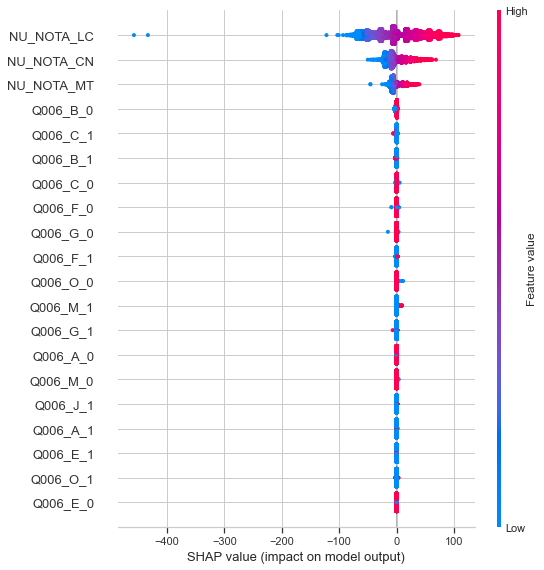

In [197]:
interpret_model(gbr)

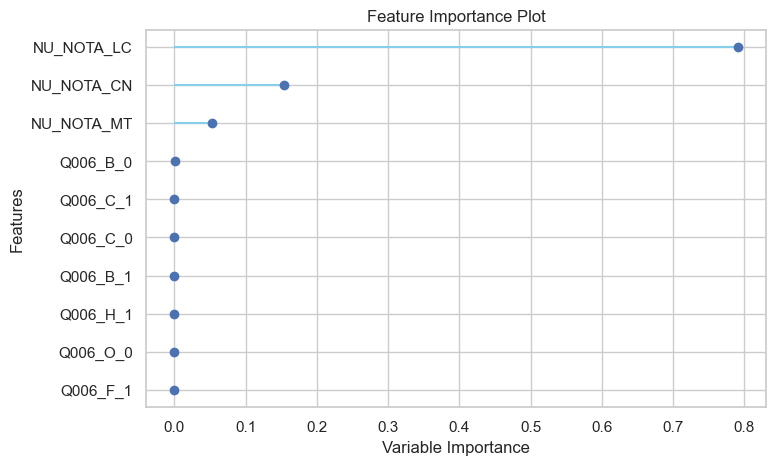

In [198]:
plot_model(gbr, 'feature')